# CS 315 Project 1: Data Exploration
## Group 2

**Section 01 - Group 2 Data Visualizations**
Wednesday, February 14, 2024

This is a **data exploration** notebook. When we don't know the data and don't know yet what to do with them, we explore various aspects until we get a good sense of what the data is good for for.
Then, we create another notebook that only contains the relevant analysis that we want to share with the world.

<a id="sec1"></a>
## 1. Loading some data

I will load into pandas the content of one of the files that contains one active test run.

In [21]:
# import all libraries I might need in this notebook
import os, csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We know that our CSV files are in the `data` folder, so let's look them up:

In [22]:
print(os.getcwd())

/Users/edithpo/Documents/CS315


In [23]:
# Load our data
cwd = os.getcwd()
filename = 'master.csv' # CHANGE FOR WHEN WE PUT THIS CODE FILE IN THE GITHUB
df = pd.read_csv(filename)

In [26]:
df

,batchID,run,batch,index,saved,author,likes,comments,shares,saves,music,hashtags
0,fn_activ_1_1_0,1,1,0,False,ina.katherine,3400000,30200,226400,94800,original sound - ina,NaN
1,fn_activ_1_1_1,1,1,1,False,leci.bby,280200,627,15500,164,original sound - fr0sty_rick,"['fyp%E3%82%B7', 'relatable', 'trending', 'ayl..."
2,fn_activ_1_1_2,1,1,2,False,kassieemariee,689400,2198,73600,6060,original sound - Taj.Mahal,NaN
3,fn_activ_1_1_3,1,1,3,False,caseynicolaxx,29500,107,855,62,Rock With It by Saucy Santana - Saucy Santana,"['fyp', 'foryou', 'foryoupage', 'caseynicola',..."
4,fn_activ_1_1_4,1,1,4,False,jailyneojeda,439800,1313,30800,965,original sound - Jailyne Ojeda,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8460,ep_cntrl_24_5_19,24,5,19,False,quedivertidotv1,7912,21,362,10,sonido original - Qué Divertido Tv,NaN
8461,ep_cntrl_24_5_20,24,5,20,False,familiapinaoficiial,228200,1110,14700,774,som original - Família.Pina.Oficial,NaN
8462,ep_cntrl_24_5_21,24,5,21,False,itssanya.1,124100,576,10700,109,original sound - Sanya,['@ucoolmediylashes']
8463,ep_cntrl_24_5_22,24,5,22,False,nayelilovera_,46300,662,6843,94,Love songs - ⭐️,"['fyp%E3%82%B7', 'trending', 'fyp', 'foryoupag..."


In [27]:
# For each team member, create a separate dataframe containing their active data
ep_activ = df[df['batchID'].str.contains('ep_activ')]
ss_activ = df[df['batchID'].str.contains('ss_activ')]
fg_activ = df[df['batchID'].str.contains('fg_activ')]
fn_activ = df[df['batchID'].str.contains('fn_activ')]
lg_activ = df[df['batchID'].str.contains('lg_activ')]
dl_activ = df[df['batchID'].str.contains('dl_activ')]

active_dfs = [ep_activ,ss_activ,fg_activ,fn_activ,lg_activ,dl_activ]

In [28]:
# For each team member, create a separate dataframe containing their control data
ep_cntrl = df[df['batchID'].str.contains('ep_cntrl')]
ss_cntrl = df[df['batchID'].str.contains('ss_cntrl')]
fg_cntrl = df[df['batchID'].str.contains('fg_cntrl')]
fn_cntrl = df[df['batchID'].str.contains('fn_cntrl')]
lg_cntrl = df[df['batchID'].str.contains('lg_cntrl')]
dl_cntrl = df[df['batchID'].str.contains('dl_cntrl')]

cntrl_dfs = [ep_cntrl,ss_cntrl,fg_cntrl,fn_cntrl,lg_cntrl,dl_cntrl]

For the moment, we can focus only on the files that contain all the videos, since the "liked" videos are just a subset of them.

In [67]:
# Find the mean likes, comments, shares, and saves for each run
ep_activ_means = ep_activ_grouped.mean().reset_index()
ep_activ_means

,run,likes,comments,shares,saves
0,6,898012.097222,7418.430556,69715.673611,17542.319444
1,7,591910.533333,7897.650000,54183.866667,11215.675000
2,36,890770.991597,9449.117647,68767.344538,23553.058824
3,37,738320.841667,5761.241667,62340.250000,11775.875000
4,38,393539.360000,5082.200000,33431.280000,5883.240000
5,39,642223.434426,6542.122951,51719.893443,10649.901639
6,40,638787.899160,7969.890756,63026.117647,7949.655462


In [68]:
ep_cntrl_means = ep_cntrl_grouped.mean().reset_index()
ep_cntrl_means

,run,likes,comments,shares,saves
0,86,714863.726190,8567.023810,68048.464286,19414.440476
1,87,605060.010753,4321.548387,48282.193548,5959.677419
2,88,347959.112069,4689.698276,25127.741379,5689.750000
3,89,490398.517241,5178.017241,40043.206897,8741.827586
4,90,442815.168421,6718.884211,41595.357895,8062.410526


In [117]:
len(ep_cntrl_means) # number of runs -- rn with messy indices, we only have ~5 runs, but in reality we have 25

5

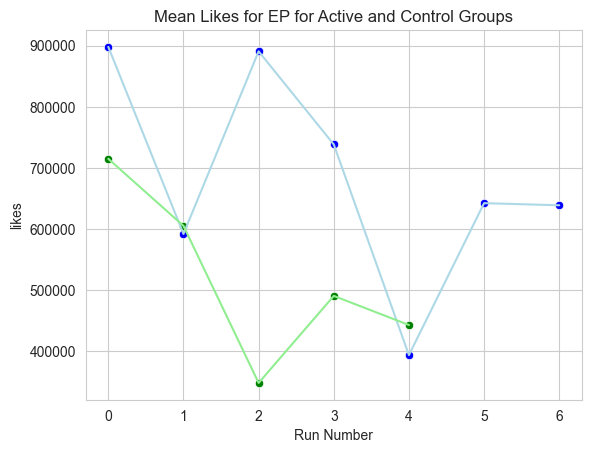

In [96]:
sns.set_style('whitegrid')
sns.scatterplot(x=range(7),y='likes',data=ep_activ_means,color='blue')
sns.lineplot(x=range(7),y='likes',data=ep_activ_means,color = 'lightblue')

sns.scatterplot(x=range(5),y='likes',data=ep_cntrl_means,color='green')
sns.lineplot(x=range(5),y='likes',data=ep_cntrl_means,color = 'lightgreen')

plt.title('Mean Likes for EP for Active and Control Groups')
plt.xlabel('Run Number')
plt.show()

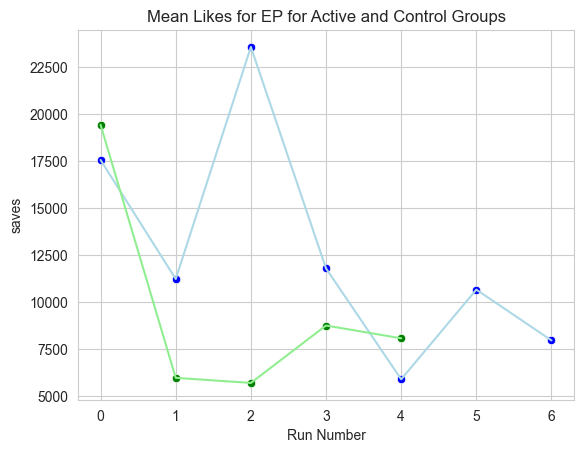

In [97]:
sns.set_style('whitegrid')
sns.scatterplot(x=range(7),y='saves',data=ep_activ_means,color='blue')
sns.lineplot(x=range(7),y='saves',data=ep_activ_means,color = 'lightblue')

sns.scatterplot(x=range(5),y='saves',data=ep_cntrl_means,color='green')
sns.lineplot(x=range(5),y='saves',data=ep_cntrl_means,color = 'lightgreen')

plt.title('Mean Saves for EP for Active and Control Groups')
plt.xlabel('Run Number')
plt.show()

<Axes: xlabel='None', ylabel='likes'>

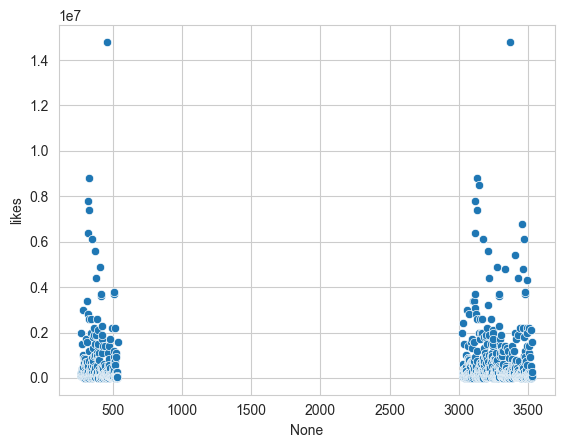

In [83]:
sns.set_style('whitegrid')
x = ep_cntrl
y = ep_activ['likes']
sns.scatterplot(x=x,y=y)

In [58]:
# GROUP2 CODE
# Create a separate interaction for each control and each active
ep_activ.groupby('run').describe()
# ep_activ[ep_activ['batch']==1 & ep_activ['run']==1]

batch                                               index             \
     count      mean       std  min  25%  50%  75%  max  count       mean   
run                                                                         
6    144.0  3.222222  1.324563  1.0  2.0  3.0  4.0  5.0  144.0  12.361111   
7    120.0  3.308333  1.333447  1.0  2.0  4.0  4.0  5.0  120.0  11.583333   
36   119.0  3.336134  1.323051  1.0  2.0  3.0  4.5  5.0  119.0  12.226891   
37   120.0  3.283333  1.271427  1.0  2.0  3.0  4.0  5.0  120.0  12.533333   
38    25.0  1.560000  0.506623  1.0  1.0  2.0  2.0  2.0   25.0   5.840000   
39   122.0  3.278689  1.293738  1.0  2.0  3.0  4.0  5.0  122.0  12.622951   
40   119.0  3.268908  1.306421  1.0  2.0  3.0  4.0  5.0  119.0  12.277311   

     ...   shares            saves                                            \
     ...      75%       max  count          mean           std   min     25%   
run  ...                                                                       
6    ...  85625.0  638400.0  144.0  17542.319444  41589.593501   0.0  489.50   
7    ...  45100.0  801500.0  120.0  11215.675000  41776.676100   2.0  245.00   
36   ...  70950.0  690400.0  119.0  23553.058824  60652.251786   0.0  552.00   
37   ...  84800.0  638400.0  120.0  11775.875000  25963.429190   0.0  462.75   
38   ...  29600.0  268700.0   25.0   5883.240000   9144.880869  65.0  269.00   
39   ...  58175.0  801500.0  122.0  10649.901639  41325.860120   2.0  246.00   
40   ...  48850.0  558400.0  119.0   7949.655462  17840.033731  21.0  241.00   

                                 
        50%       75%       max  
run                              
6    1971.0  14475.00  268200.0  
7     682.0   5345.75  413700.0  
36   2508.0  17000.00  466900.0  
37   2026.0  12725.00  190100.0  
38   1022.0   8105.00   35800.0  
39    850.5   5990.75  413700.0  
40    810.0   4693.00  124900.0  

[7 rows x 48 columns]

Some of the values, like likes, are well in the millions, so the graphs will be difficult to "see".

In [113]:
ss_activ_df = ss_activ[['likes','comments','shares','saves']].reset_index()
ss_cntrl_df = ss_cntrl[['likes','comments','shares','saves']].reset_index()

In [31]:
#readfile
def plot_metric_member(metric, initial):
    '''
    Initials should be one of six group members: ep, dl, lg, fg, fn, ss
    Metric is one of the following metrics of a TikTok's popularity: likes, comments, shares, saves
    Creates dataframes for one person's control and active account and plots the mean for each run.
    '''
    df_activ = df[df['batchID'].str.contains(f'{initial}_activ')]
    df_cntrl = df[df['batchID'].str.contains(f'{initial}_cntrl')]
    
    #get descriptive statistic for df by index -- assuming 25 runs
    df_activ_group = df_activ.groupby('run')[[metric]].mean()
    df_cntrl_group = df_cntrl.groupby('run')[[metric]].mean()
    
    #graph the average of the chosen metric for both control and active accounts over 25 runs
    sns.set_style('whitegrid')
    sns.scatterplot(x=range(len(df_activ_group)),y=metric,data=df_activ_group,color='blue')
    sns.lineplot(x=range(len(df_activ_group)),y=metric,data=df_activ_group,color = 'lightblue')

#     sns.scatterplot(x=range(len(df_cntrl_group)),y=metric,data=df_cntrl_group,color='green')
#     sns.lineplot(x=range(len(df_cntrl_group)),y=metric,data=df_cntrl_group,color = 'lightgreen')

    plt.title(f'Mean {metric} for {initial} for Active and Control Groups')
    plt.xlabel('Run Number')
    plt.show()


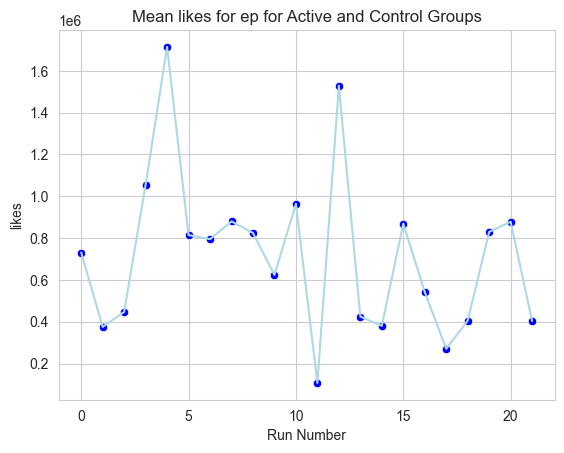

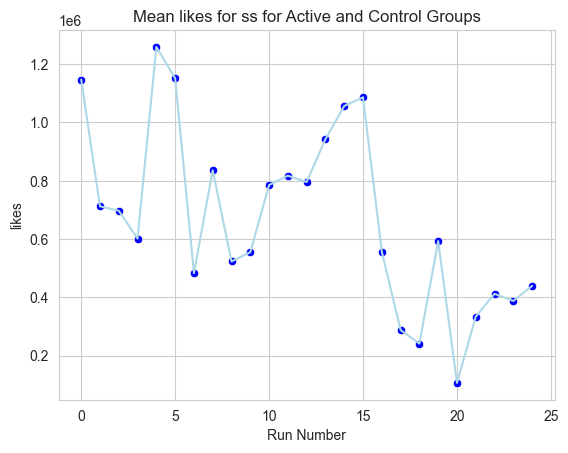

KeyError: 'x'

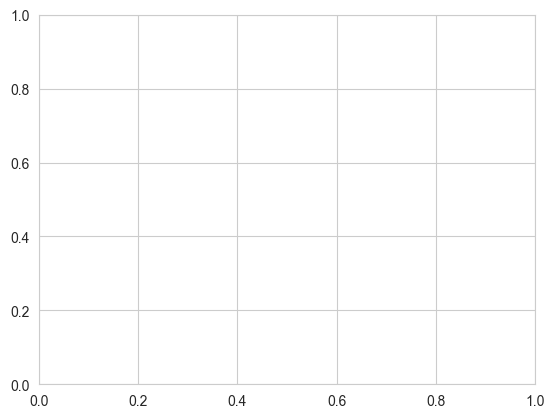

In [32]:
members = ["ep", "ss", "dl", "lg", "fg", "fn"]
metrics = ["likes", "comments", "shares", "saves"]

for metric in metrics:
    for member in members:
        plot_metric_member(metric,member)

# plot_metric_member('saves','ss')